In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.spatial.distance import pdist, squareform

def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

names = [
    "one",
    "two",
    "three",
    
]  # this creates dummy names for the formations
number_of_layers = (
    2
)  # this is the number of tops you want in your training data
smallest = -5
largest = 12
step = 0.2
for i in range(19,20):

    no_of_neighbors = i

    np.random.seed(19)
    df = pd.DataFrame()
    locations = pd.DataFrame()
    elevation_random = sorted(
        np.random.uniform(smallest, largest, number_of_layers - 1)
    )

    print(f"STARTING with {no_of_neighbors}")
    for j in np.arange(smallest, largest, step):
        rolling = pd.DataFrame()
        for i in range(len(names[0 : number_of_layers - 1])):
            basement = 0.001 + (10 / j) * np.sin(
                1 - np.arange(0, 40, 0.1) / (j * 10) + 0.001
            )
            elevation = np.full(400, j)
            topbasement = np.where(basement > elevation, elevation, basement)
            rolling["zero"] = topbasement
            layer_elevation = (
                0.001
                + (10 / j) * np.sin(1 - np.arange(0, 40, 0.1) / (j * 10) + 0.001)
                + elevation_random[i]
            )
            layer_elevation = np.where(
                layer_elevation > elevation, elevation, layer_elevation
            )
            rolling[names[i]] = layer_elevation
        x = np.arange(0, 40, 0.1)
        y = np.random.randint(0, 10, len(x))
        if j % 0.2 > 0.1:
            rolling["ex"] = x * np.cos(-j / 2) - y * np.sin(-j / 2)
            rolling["ey"] = y * np.cos(-j / 2) - x * np.sin(-j / 2)
        else:
            rolling["ex"] = x * np.cos(j / 2) - y * np.sin(j / 2)
            rolling["ey"] = y * np.cos(j / 2) - x * np.sin(j / 2)
        for k in range(100):
            rolling.iloc[
                np.random.randint(0, 399),
                np.random.randint(0, number_of_layers - 1),
            ] = 0
        hood = squareform(pdist(rolling.iloc[:, -2:]))
        neighbors = []
        for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
            selected = (
                rolling.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
                .stack()
                .to_frame()
                .T
            )
            selected.columns = selected.columns.droplevel()
            neighbors.append(selected)
        frame = pd.concat(neighbors, sort=False)
        frame.index = range(len(frame))
        neighborhood = pd.concat([rolling.iloc[:, :-2], frame], axis=1)
        thicknesses = neighborhood.diff(axis=1)
        thicknesses[thicknesses < 0] = 0
        thicknesses.drop(columns="zero", inplace=True)
        locations = pd.concat((locations, rolling.iloc[:, -2:]))
        df = pd.concat((df, thicknesses))
    logged = df.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    powered = df.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    at = (
        pd.concat([df, logged, powered, locations], axis=1, join_axes=[df.index])
        .dropna()
        .replace(-np.inf, 0)
    )
    print('Getting the features')
    features = ['thickness',
    'thickness neighbor 1',
    'thickness neighbor 2',
    'thickness neighbor 3',
    'thickness neighbor 4',
    'thickness neighbor 5',
    'thickness neighbor 6',
    'thickness neighbor 7',
    'thickness neighbor 8',
    'thickness neighbor 9',
    'thickness neighbor 10',
    'thickness neighbor 11',
    'thickness neighbor 12',
    'thickness neighbor 13',
    'thickness neighbor 14',
    'thickness neighbor 15',
    'thickness neighbor 16',
    'thickness neighbor 17',
    'thickness neighbor 18',
    'thickness neighbor 19',
    'thickness neighbor 20',
    'thickness natural log',
    'thickness natural log neighbor 1',
    'thickness natural log neighbor 2',
    'thickness natural log neighbor 3',
    'thickness natural log neighbor 4',
    'thickness natural log neighbor 5',
    'thickness natural log neighbor 6',
    'thickness natural log neighbor 7',
    'thickness natural log neighbor 8',
    'thickness natural log neighbor 9',
    'thickness natural log neighbor 10',
    'thickness natural log neighbor 11',
    'thickness natural log neighbor 12',
    'thickness natural log neighbor 13',
    'thickness natural log neighbor 14',
    'thickness natural log neighbor 15',
    'thickness natural log neighbor 16',
    'thickness natural log neighbor 17',
    'thickness natural log neighbor 18',
    'thickness natural log neighbor 19',
    'thickness natural log neighbor 20',
    'thickness power',
    'thickness power neighbor 1',
    'thickness power neighbor 2',
    'thickness power neighbor 3',
    'thickness power neighbor 4',
    'thickness power neighbor 5',
    'thickness power neighbor 6',
    'thickness power neighbor 7',
    'thickness power neighbor 8',
    'thickness power neighbor 9',
    'thickness power neighbor 10',
    'thickness power neighbor 11',
    'thickness power neighbor 12',
    'thickness power neighbor 13',
    'thickness power neighbor 14',
    'thickness power neighbor 15',
    'thickness power neighbor 16',
    'thickness power neighbor 17',
    'thickness power neighbor 18',
    'thickness power neighbor 19',
    'thickness power neighbor 20',
    'x location',
    'y location',
    'class'
    ]

    featured = [features[0:no_of_neighbors+1], features[21:22+no_of_neighbors], features[42:43+no_of_neighbors], features[-3:]]
    flat_features = flatten(featured)

    print('normalizing the truncation')
    # NORMALIZING THE DATA
    # normalize the data from 0 to 1
    normalized_dfa = (at - at.min()) / (at.max() - at.min()).replace(0, 0.00001)
    normalized_locations = (locations - locations.min()) / (
        locations.max() - locations.min()
    )
    x = normalized_locations.ex.values
    y = normalized_locations.ey.values
    normalized_dfa["ex"] = x
    normalized_dfa["ey"] = y

    np.random.seed(19)

    df_onlap = pd.DataFrame()
    locations = pd.DataFrame()
    for j in np.arange(smallest, largest, step):
        rolling = pd.DataFrame()
        for i in range(len(names[0 : number_of_layers - 1])):
            basement = 0.001 + (10 / j) * np.sin(
                1 - np.arange(0, 40, 0.1) / (j * 10) + 0.001
            )
            elevation = np.full(400, j)
            topbasement = np.where(basement > elevation, elevation, basement)
            rolling["zero"] = topbasement
            strat_elevation = np.full(400, elevation_random[i])
            onlap = np.where(strat_elevation > basement, strat_elevation, basement)
            layer_elevation = np.where(onlap > elevation, elevation, onlap)
            rolling[names[i]] = layer_elevation
        x = np.arange(0, 40, 0.1)
        y = np.random.randint(0, 10, len(x))
        if j % 0.2 > 0.1:
            rolling["ex"] = x * np.cos(-j / 2) - y * np.sin(-j / 2)
            rolling["ey"] = y * np.cos(-j / 2) - x * np.sin(-j / 2)
        else:
            rolling["ex"] = x * np.cos(j / 2) - y * np.sin(j / 2)
            rolling["ey"] = y * np.cos(j / 2) - x * np.sin(j / 2)
        for k in range(100):
            rolling.iloc[
                np.random.randint(0, 399),
                np.random.randint(0, number_of_layers - 1),
            ] = 0
        hood = squareform(pdist(rolling.iloc[:, -2:]))
        neighbors = []
        for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
            selected = (
                rolling.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
                .stack()
                .to_frame()
                .T
            )
            selected.columns = selected.columns.droplevel()
            neighbors.append(selected)
        frame = pd.concat(neighbors, sort=False)
        frame.index = range(len(frame))
        neighborhood = pd.concat([rolling.iloc[:, :-2], frame], axis=1)
        thicknesses = neighborhood.diff(axis=1)
        thicknesses[thicknesses < 0] = 0
        thicknesses.drop(columns="zero", inplace=True)
        locations = pd.concat((locations, rolling.iloc[:, -2:]))
        df_onlap = pd.concat((df_onlap, thicknesses))
    onlaplogged = df_onlap.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    onlappowered = df_onlap.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    ot = (
        pd.concat(
            [df_onlap, onlaplogged, onlappowered, locations],
            axis=1,
            join_axes=[df_onlap.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    print('normalizing the onlap')
    # NORMALIZING THE DATA
    # normalize the data from 0 to 1
    normalized_dfo = (ot - ot.min()) / (ot.max() - ot.min()).replace(0, 0.00001)
    normalized_locations = (locations - locations.min()) / (
        locations.max() - locations.min()
    )
    x = normalized_locations.ex.values
    y = normalized_locations.ey.values
    normalized_dfo["ex"] = x
    normalized_dfo["ey"] = y

    np.random.seed(19)

    df_horizontal = pd.DataFrame()
    locations = pd.DataFrame()
    for j in np.arange(smallest, largest, step):
        rolling = pd.DataFrame()
        for i in range(len(names[0 : number_of_layers - 1])):
            basement = np.full(400, 0) - np.random.rand(400) / 100
            elevation = np.full(400, j)
            topbasement = np.where(basement > elevation, elevation, basement)
            rolling["zero"] = topbasement
            strat_elevation = np.full(400, elevation_random[i])
            layer_elevation = np.where(
                strat_elevation > elevation, elevation, strat_elevation
            )
            rolling[names[i]] = layer_elevation
        x = np.arange(0, 40, 0.1)
        y = np.random.randint(0, 10, len(x))
        if j % 0.2 > 0.1:
            rolling["ex"] = x * np.cos(-j / 2) - y * np.sin(-j / 2)
            rolling["ey"] = y * np.cos(-j / 2) - x * np.sin(-j / 2)
        else:
            rolling["ex"] = x * np.cos(j / 2) - y * np.sin(j / 2)
            rolling["ey"] = y * np.cos(j / 2) - x * np.sin(j / 2)
        for k in range(100):
            rolling.iloc[
                np.random.randint(0, 399),
                np.random.randint(0, number_of_layers - 1),
            ] = 0
        hood = squareform(pdist(rolling.iloc[:, -2:]))
        neighbors = []
        for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
            selected = (
                rolling.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
                .stack()
                .to_frame()
                .T
            )
            selected.columns = selected.columns.droplevel()
            neighbors.append(selected)
        frame = pd.concat(neighbors, sort=False)
        frame.index = range(len(frame))
        neighborhood = pd.concat([rolling.iloc[:, :-2], frame], axis=1)
        thicknesses = neighborhood.diff(axis=1)
        thicknesses[thicknesses < 0] = 0
        thicknesses.drop(columns="zero", inplace=True)
        locations = pd.concat((locations, rolling.iloc[:, -2:]))
        df_horizontal = pd.concat((df_horizontal, thicknesses))
    horizlogged = df_horizontal.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    horizpowered = df_horizontal.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    hs = (
        pd.concat(
            [df_horizontal, horizlogged, horizpowered, locations],
            axis=1,
            join_axes=[df_horizontal.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    print('normalizing the horizontal strata')
    # NORMALIZING THE DATA
    # normalize the data from 0 to 1
    normalized_dfh = (hs - hs.min()) / (hs.max() - hs.min()).replace(0, 0.00001)
    normalized_locations = (locations - locations.min()) / (
        locations.max() - locations.min()
    )
    x = normalized_locations.ex.values
    y = normalized_locations.ey.values
    normalized_dfh["ex"] = x
    normalized_dfh["ey"] = y

    # now assign classes to the datasets, 1 is onlap, 0 is angular unconformity
    normalized_dfa["class"] = 0 #truncation
    normalized_dfo["class"] = 1 #onlap
    normalized_dfh["class"] = 2 #horizontal

    dataset = pd.concat((normalized_dfa, normalized_dfo, normalized_dfh))
    dataset.columns = flat_features
    print(f'saving the training data for {no_of_neighbors}')
    dataset.to_csv(
        r"F:\\Geology\\WSGS\\Projects\\jupyter\\" + str(number_of_layers) + "layers"+str(no_of_neighbors)+"neighbors.csv"
    )
    # dataset = pd.read_csv(r'D:\\jupyter\\'+str(number_of_layers)+'layers20neighbors.csv', index_col=[0])
    print(f'Done with {no_of_neighbors} neighbors')

STARTING with 19


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:125: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


Getting the features
normalizing the truncation


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:272: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


normalizing the onlap


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:347: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


normalizing the horizontal strata
saving the training data for 19
Done with 19 neighbors


# end of building training data

In [11]:
from sklearn.model_selection import train_test_split

# next let's split our toy data into training and test sets, choose how much with test_size of the data becomes the test set
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[0:, 0:-1].values,
    dataset.iloc[0:, -1].values,
    test_size=0.1,
    random_state=86,
)

In [12]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(
    y_train
)  # this converts the target variable to one-hot encoding
y_test_encoded = to_categorical(
    y_test
)  # same with the test data conversion to one-hot encoding

Using TensorFlow backend.


In [13]:
# Import keras and some layers, we are going to build a network with two dense layers and a dropout layer
from keras.models import Sequential
from keras.layers import Dense, Dropout

# this is the network, we initialize with a dense layer and a relu activation
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dropout(0.1))  # dropout to avoid overfitting
model.add(
    Dense(
        1000,
        kernel_initializer="random_uniform",
        bias_initializer="zeros",
        activation="relu",
    )
)
model.add(Dropout(0.2))
model.add(
    Dense(3, kernel_initializer="random_uniform", activation="sigmoid")
)  # and another dense layer with sigmoid activation

In [14]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="nadam",
    metrics=["categorical_accuracy"],
)
# builds the model, with categorical crossentropy for our loss function, optimizing using nadam, and using categorical accuracy
# as our accuracy metric

In [15]:
model.fit(
    X_train,
    y_train_encoded,
    epochs=1,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
)  # , callbacks=[tbCallBack]) #Fitting the model for 60 epochs and batch size of 32

Train on 73440 samples, validate on 18360 samples
Epoch 1/1
73440/73440 [==============================] - 22s 293us/step - loss: 0.0163 - categorical_accuracy: 0.9935 - val_loss: 6.2001e-04 - val_categorical_accuracy: 0.9999


In [16]:
score = model.evaluate(
    X_test, y_test_encoded
)  # tests the model on the test data
preds = model.predict(
    X_test
)  # creates predictions on the test data that we can use

10200/10200 [==============================] - 0s 39us/step


ModuleNotFoundError: No module named 'scikitplot'

# Real World Data

In [17]:
# let's import some real world data from southwestern Wyoming
# this is from the Rock Springs Uplift in Wyoming and has been interpreted as an angular unconformity
tops_api = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunion.csv").fillna(
    0
)  # this file is available in the unconformity or onlap folder in the repo
# tops = tops_api[['Kfh','Klz','Kll', 'Klr', 'Kl', 'x', 'y']] # for all Cretaceous
# tops = tops_api[['Kl', 'Tfc','Tfb','Tfob', 'Tfu', 'x', 'y']] #tertiary units
tops = tops_api[["Klr", "Tfu", "x", "y"]]
# tops =  tops_api[['Kfh', 'Kl', 'x', 'y']]
# tops = tops_api[['Kfh', 'Klz', 'Kll', 'Kl', 'Tfc', 'Tfob', 'Tfu', 'x', 'y']] #for all Cretaceous and Tertiary
locations = pd.DataFrame()
number_of_tops = len(tops.columns) - 2
dataset = pd.read_csv(
    r"D:/jupyter/" + str(number_of_tops) + "layers20neighbors.csv",
    index_col=[0],
)

In [18]:
hood = squareform(pdist(tops.iloc[:, -2:]))
neighbors = []
for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
    selected = (
        tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
        .stack()
        .to_frame()
        .T
    )
    selected.columns = selected.columns.droplevel()
    neighbors.append(selected)
frame = pd.concat(neighbors, sort=False)
frame.index = range(len(frame))
neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
thicknesses = neighborhood.diff(axis=1) * -1
thicknesses[thicknesses < 0] = 0
thicknesses.drop(columns=tops.columns[0], inplace=True)
thicknesses[thicknesses < 0] = 0
thicknesses[thicknesses > 3000] = 0
locations = tops[["x", "y"]]
real_world_log = thicknesses.apply(
    np.log
)  # take the log of thicknesses for feature engineering
real_world_pow = thicknesses.apply(
    lambda x: x ** 10
)  # calculates the power values of thickness for another feature
rw = (
    pd.concat(
        [thicknesses, real_world_log, real_world_pow, locations],
        axis=1,
        join_axes=[thicknesses.index],
    )
    .dropna()
    .replace(-np.inf, 0)
)
normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
    0, 0.00001
)  # normalize the data from 0 to 1
real_data = normalized_rw.values

In [19]:
well_preds = model.predict(real_data)  # make some predictions

(array([  5.,   0.,   0.,   0.,   0., 534.,   0.,   0.,   0., 349.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

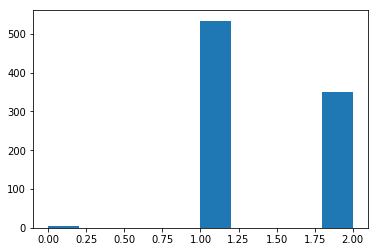

In [20]:
predictions = np.argmax(
    well_preds, axis=1
)  # convert them to our binary classification
plt.hist(
    predictions, label=["Angular Unconformity", "Onlap"]
)  # visualize the predictions as a histogram, we are expecting all the wells to be classified as '0'

Text(0.5, 1.0, 'Neural Net Predictions')

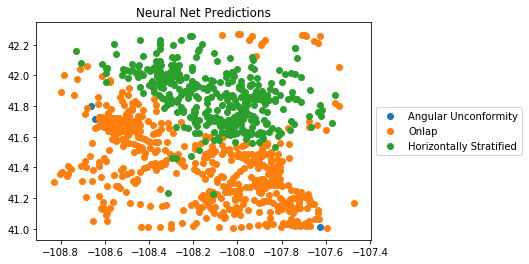

In [21]:
tops_api["predictions"] = predictions
well_locs = pd.read_csv(
    r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
)
merged = pd.merge(tops_api, well_locs, on="API")
plt.scatter(
    merged[merged["predictions"] == 0].LON,
    merged[merged["predictions"] == 0].LAT,
    label="Angular Unconformity",
)
plt.scatter(
    merged[merged["predictions"] == 1].LON,
    merged[merged["predictions"] == 1].LAT,
    label="Onlap",
)
plt.scatter(
    merged[merged["predictions"] == 2].LON,
    merged[merged["predictions"] == 2].LAT,
    label="Horizontally Stratified",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Neural Net Predictions")

# SVM classifier for a baseline on training

In [23]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel="linear", gamma="auto")
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

NameError: name 'topcombos' is not defined

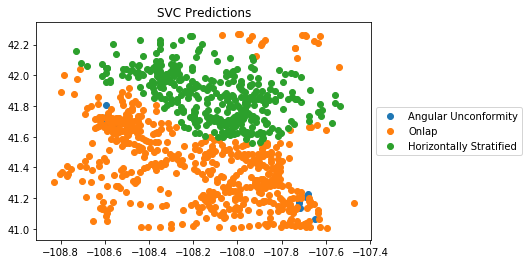

In [24]:
well_preds = clf.predict(real_data)
tops_api["predictionsvm"] = well_preds
well_locs = pd.read_csv(
    r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
)
merged = pd.merge(tops_api, well_locs, on="API")
plt.scatter(
    merged[merged["predictionsvm"] == 0].LON,
    merged[merged["predictionsvm"] == 0].LAT,
    label="Angular Unconformity",
)
plt.scatter(
    merged[merged["predictionsvm"] == 1].LON,
    merged[merged["predictionsvm"] == 1].LAT,
    label="Onlap",
)
plt.scatter(
    merged[merged["predictionsvm"] == 2].LON,
    merged[merged["predictionsvm"] == 2].LAT,
    label="Horizontally Stratified",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("SVC Predictions")
plt.savefig(
    r"D:/predictions/"
    + str(topcombos[1][0])
    + "_"
    + str(topcombos[1][1])
    + "_SVM.jpg"
)

In [ ]:
y_est = clf.predict(X_test)

In [25]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

Text(0.5, 1.0, 'Linear SVC Predictions')

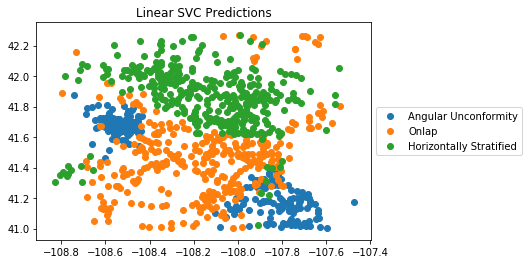

In [26]:
well_preds = clf.predict(real_data)
tops_api["predictionsvm"] = well_preds
well_locs = pd.read_csv(
    r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
)
merged = pd.merge(tops_api, well_locs, on="API")
plt.scatter(
    merged[merged["predictionsvm"] == 0].LON,
    merged[merged["predictionsvm"] == 0].LAT,
    label="Angular Unconformity",
)
plt.scatter(
    merged[merged["predictionsvm"] == 1].LON,
    merged[merged["predictionsvm"] == 1].LAT,
    label="Onlap",
)
plt.scatter(
    merged[merged["predictionsvm"] == 2].LON,
    merged[merged["predictionsvm"] == 2].LAT,
    label="Horizontally Stratified",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Linear SVC Predictions")

In [ ]:
y_est = clf.predict(X_test)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
y_est = neigh.predict(X_test)

ModuleNotFoundError: No module named 'scikitplot'

Text(0.5, 1.0, 'KNeighbor Predictions')

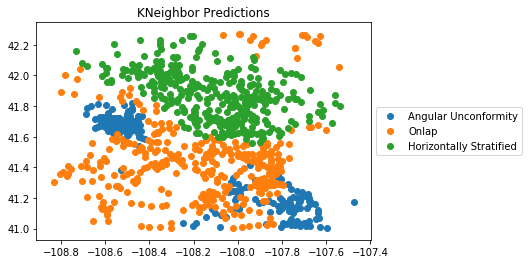

In [29]:
hood = squareform(pdist(tops.iloc[:, -2:]))
neighbors = []
for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
    selected = (
        tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
        .stack()
        .to_frame()
        .T
    )
    selected.columns = selected.columns.droplevel()
    neighbors.append(selected)
frame = pd.concat(neighbors, sort=False)
frame.index = range(len(frame))
neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
thicknesses = neighborhood.diff(axis=1) * -1
thicknesses[thicknesses < 0] = 0
thicknesses.drop(columns=tops.columns[0], inplace=True)
thicknesses[thicknesses < 0] = 0
thicknesses[thicknesses > 3000] = 0
locations = tops[["x", "y"]]
real_world_log = thicknesses.apply(
    np.log
)  # take the log of thicknesses for feature engineering
real_world_pow = thicknesses.apply(
    lambda x: x ** 10
)  # calculates the power values of thickness for another feature
rw = (
    pd.concat(
        [thicknesses, real_world_log, real_world_pow, locations],
        axis=1,
        join_axes=[thicknesses.index],
    )
    .dropna()
    .replace(-np.inf, 0)
)
normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
    0, 0.00001
)  # normalize the data from 0 to 1
real_data = normalized_rw.values
well_preds = neigh.predict(real_data)
probs = neigh.predict_proba(real_data)
tops_api["predictionknc"] = well_preds
tops_api["ang_prob"] = probs[:, 0]
tops_api["onlap_prob"] = probs[:, 1]
tops_api["horiz_prob"] = probs[:, 2]

well_locs = pd.read_csv(
    r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
)
merged = pd.merge(tops_api, well_locs, on="API")
plt.scatter(
    merged[merged["predictionknc"] == 0].LON,
    merged[merged["predictionknc"] == 0].LAT,
    label="Angular Unconformity",
)
plt.scatter(
    merged[merged["predictionknc"] == 1].LON,
    merged[merged["predictionknc"] == 1].LAT,
    label="Onlap",
)
plt.scatter(
    merged[merged["predictionknc"] == 2].LON,
    merged[merged["predictionknc"] == 2].LAT,
    label="Horizontally Stratified",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("KNeighbor Predictions")

In [30]:
xs = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunionxs.csv")
cross_section = merged[merged["API"].isin(xs.api)].sort_values(by="LON")

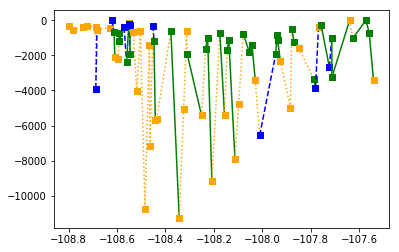

In [31]:
for i in enumerate(cross_section.index):
    if cross_section.iloc[i[0]].predictionknc == 0:
        plt.plot(
            cross_section["LON"][i[0] : i[0] + 2],
            cross_section["Tfu"][i[0] : i[0] + 2] * -1,
            linestyle="--",
            color="Blue",
            marker="s",
        )
    elif cross_section.iloc[i[0]].predictionknc == 1:
        plt.plot(
            cross_section["LON"][i[0] : i[0] + 2],
            cross_section["Tfu"][i[0] : i[0] + 2] * -1,
            linestyle=":",
            color="Orange",
            marker="s",
        )
    elif cross_section.iloc[i[0]].predictionknc == 2:
        plt.plot(
            cross_section["LON"][i[0] : i[0] + 2],
            cross_section["Tfu"][i[0] : i[0] + 2] * -1,
            linestyle="-",
            color="Green",
            marker="s",
        )

In [3]:
tops_api = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunion.csv").fillna(
    0
)  # this file is available in the unconformity or onlap folder in the repo
tops = tops_api[
    ["Klz", "Kll", "Kl", "Tfc", "Tfob", "Tfu", "x", "y"]
]  # for all Cretaceous and Tertiary
locations = pd.DataFrame()
number_of_tops = len(tops.columns) - 2
dataset = pd.read_csv(
    r"D:/jupyter/" + str(number_of_tops) + "layers20neighbors.csv",
    index_col=[0],
)

# iterate through the different tops 

In [34]:
number_of_tops = 2
dataset = pd.read_csv(
    r"D:/jupyter/" + str(number_of_tops) + "layers20neighbors.csv",
    index_col=[0],
)

from sklearn.model_selection import train_test_split

# next let's split our toy data into training and test sets, choose how much with test_size of the data becomes the test set
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[0:, 0:-1].values,
    dataset.iloc[0:, -1].values,
    test_size=0.1,
    random_state=86,
)
tops_api = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunion.csv").fillna(
    0
)  # this file is available in the unconformity or onlap folder in the repo

iterable = ["Kfh", "Klz", "Kll", "Klr", "Kl", "Tfc", "Tfb", "Tfob", "Tfu"]
topcombos = list(zip(iterable, iterable[1:]))
topcombos.append(("Kfh", "Kl"))
topcombos.append(("Kl", "Tfu"))
for j in enumerate(topcombos):
    fmtops = list(topcombos[j[0]])
    fmtops.extend(["x", "y"])
    tops = tops_api[fmtops]

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)

    # calculate thicknesses and neighbors for the two tops
    hood = squareform(pdist(tops.iloc[:, -2:]))
    neighbors = []
    for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
        selected = (
            tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
            .stack()
            .to_frame()
            .T
        )
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
    thicknesses = neighborhood.diff(axis=1) * -1
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns=tops.columns[0], inplace=True)
    thicknesses[thicknesses < 0] = 0
    thicknesses[thicknesses > 3000] = 0
    locations = tops[["x", "y"]]
    real_world_log = thicknesses.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    real_world_pow = thicknesses.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    rw = (
        pd.concat(
            [thicknesses, real_world_log, real_world_pow, locations],
            axis=1,
            join_axes=[thicknesses.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
        0, 0.00001
    )  # normalize the data from 0 to 1
    real_data = normalized_rw.values

    # load up the well location data and merge it with the tops data
    well_locs = pd.read_csv(
        r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
    )
    well_preds = neigh.predict(real_data)
    tops_api["prediction_" + topcombos[j[0]][1]] = well_preds
    merged = pd.merge(tops_api, well_locs, on="API")

In [35]:
xs = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunionxs.csv")
xs = xs[xs["xs"] == "F"]  # cross section to look at
cross_section = merged[merged["API"].isin(xs.api)].sort_values(by="LAT")

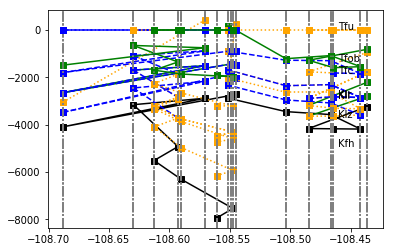

In [36]:
flatten_on = "Tfu"
plt.plot(
    cross_section["LON"],
    (cross_section["Kfh"] * -1) - (cross_section[flatten_on] * -1),
    linestyle="-",
    color="k",
    marker="s",
)
for top in iterable[1:]:
    for i in enumerate(cross_section.index):
        plt.axvline(
            x=cross_section["LON"].iloc[i[0]], color="Gray", linestyle="-."
        )
        if cross_section.iloc[i[0]][top] != 0:
            if cross_section.iloc[i[0]]["prediction_" + str(top)] == 0:
                plt.plot(
                    cross_section["LON"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle="--",
                    color="Blue",
                    marker="s",
                    label=top,
                )
            elif cross_section.iloc[i[0]]["prediction_" + str(top)] == 1:
                plt.plot(
                    cross_section["LON"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle=":",
                    color="Orange",
                    marker="s",
                )
            elif cross_section.iloc[i[0]]["prediction_" + str(top)] == 2:
                plt.plot(
                    cross_section["LON"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle="-",
                    color="Green",
                    marker="s",
                )

        else:
            pass

plt.text(
    cross_section["LON"].iloc[-1] + 0.1,
    ((cross_section["Kfh"] * -1) - (cross_section[flatten_on] * -1)).values[
        -5
    ],
    "Kfh",
)
for top in iterable[1:]:
    if cross_section[top].max() > 0:
        plt.text(
            cross_section["LON"].iloc[-1] + 0.1,
            (
                (cross_section[top] * -1) - (cross_section[flatten_on] * -1)
            ).values[-5],
            top,
        )
    else:
        pass

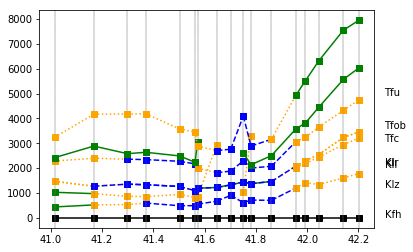

In [37]:
flatten_on = "Kfh"
plt.plot(
    cross_section["LAT"],
    (cross_section["Kfh"] * -1) - (cross_section[flatten_on] * -1),
    linestyle="-",
    color="k",
    marker="s",
)
for top in iterable[1:]:
    for i in enumerate(cross_section.index):
        plt.axvline(
            x=cross_section["LAT"].iloc[i[0]],
            color="Gray",
            linestyle="-.",
            linewidth=0.1,
        )
        if cross_section.iloc[i[0]][top] != 0:
            if cross_section.iloc[i[0]]["prediction_" + str(top)] == 0:
                plt.plot(
                    cross_section["LAT"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle="--",
                    color="Blue",
                    marker="s",
                    label=top,
                )
            elif cross_section.iloc[i[0]]["prediction_" + str(top)] == 1:
                plt.plot(
                    cross_section["LAT"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle=":",
                    color="Orange",
                    marker="s",
                )
            elif cross_section.iloc[i[0]]["prediction_" + str(top)] == 2:
                plt.plot(
                    cross_section["LAT"][i[0] : i[0] + 2],
                    (cross_section[top][i[0] : i[0] + 2] * -1)
                    - (cross_section[flatten_on][i[0] : i[0] + 2] * -1),
                    linestyle="-",
                    color="Green",
                    marker="s",
                )

        else:
            pass

plt.text(
    cross_section["LAT"].iloc[-1] + 0.1,
    ((cross_section["Kfh"] * -1) - (cross_section[flatten_on] * -1)).values[
        -5
    ],
    "Kfh",
)
for top in iterable[1:]:
    if cross_section[top].max() > 0:
        plt.text(
            cross_section["LAT"].iloc[-1] + 0.1,
            (
                (cross_section[top] * -1) - (cross_section[flatten_on] * -1)
            ).values[-5],
            top,
        )
    else:
        pass

In [38]:
# run this for all combinations of 2 tops and SVM
from sklearn.svm import SVC
import itertools


for j in enumerate(topcombos):
    tops_api = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunion.csv").fillna(
        0
    )  # this file is available in the unconformity or onlap folder in the repo
    fmtops = list(topcombos[j[0]])
    fmtops.extend(["x", "y"])
    tops = tops_api[fmtops]

    clf = SVC(C=1, kernel="linear", gamma="auto")
    clf.fit(X_train, y_train)

    # calculate thicknesses and neighbors for the two tops
    hood = squareform(pdist(tops.iloc[:, -2:]))
    neighbors = []
    for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
        selected = (
            tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
            .stack()
            .to_frame()
            .T
        )
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
    thicknesses = neighborhood.diff(axis=1) * -1
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns=tops.columns[0], inplace=True)
    thicknesses[thicknesses < 0] = 0
    thicknesses[thicknesses > 3000] = 0
    locations = tops[["x", "y"]]
    real_world_log = thicknesses.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    real_world_pow = thicknesses.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    rw = (
        pd.concat(
            [thicknesses, real_world_log, real_world_pow, locations],
            axis=1,
            join_axes=[thicknesses.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
        0, 0.00001
    )  # normalize the data from 0 to 1
    real_data = normalized_rw.values

    # load up the well location data and merge it with the tops data
    well_locs = pd.read_csv(
        r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
    )
    well_preds = clf.predict(real_data)
    tops_api["predictionsvm"] = well_preds
    merged = pd.merge(tops_api, well_locs, on="API")

    plt.scatter(
        merged[merged["predictionsvm"] == 0].LON,
        merged[merged["predictionsvm"] == 0].LAT,
        label="Angular Unconformity",
    )
    plt.scatter(
        merged[merged["predictionsvm"] == 1].LON,
        merged[merged["predictionsvm"] == 1].LAT,
        label="Onlap",
    )
    plt.scatter(
        merged[merged["predictionsvm"] == 2].LON,
        merged[merged["predictionsvm"] == 2].LAT,
        label="Horizontally Stratified",
    )
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title("SVC Predictions")
    plt.savefig(r"D:/predictions/" + str(topcombos[j[0]]) + "_SVM.jpg")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
# run this for all combinations of 2 tops and KNN
from sklearn.neighbors import KNeighborsClassifier
import itertools
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona


for j in enumerate(topcombos):
    tops_api = pd.read_csv(r"D:\jupyter\EarlyWSGS\ftunion.csv").fillna(
        0
    )  # this file is available in the unconformity or onlap folder in the repo
    fmtops = list(topcombos[j[0]])
    fmtops.extend(["x", "y"])
    tops = tops_api[fmtops]

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)

    # calculate thicknesses and neighbors for the two tops
    hood = squareform(pdist(tops.iloc[:, -2:]))
    neighbors = []
    for i in enumerate(hood.argsort()[0:, 1 : no_of_neighbors + 1]):
        selected = (
            tops.iloc[hood.argsort()[i[0], 1 : no_of_neighbors + 1], 0:-2]
            .stack()
            .to_frame()
            .T
        )
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([tops.iloc[:, :-2], frame], axis=1)
    thicknesses = neighborhood.diff(axis=1) * -1
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns=tops.columns[0], inplace=True)
    thicknesses[thicknesses < 0] = 0
    thicknesses[thicknesses > 3000] = 0
    locations = tops[["x", "y"]]
    real_world_log = thicknesses.apply(
        np.log
    )  # take the log of thicknesses for feature engineering
    real_world_pow = thicknesses.apply(
        lambda x: x ** 10
    )  # calculates the power values of thickness for another feature
    rw = (
        pd.concat(
            [thicknesses, real_world_log, real_world_pow, locations],
            axis=1,
            join_axes=[thicknesses.index],
        )
        .dropna()
        .replace(-np.inf, 0)
    )
    normalized_rw = (rw - rw.min()) / (rw.max() - rw.min()).replace(
        0, 0.00001
    )  # normalize the data from 0 to 1
    real_data = normalized_rw.values

    # load up the well location data and merge it with the tops data
    well_locs = pd.read_csv(
        r"D:\jupyter\EarlyWSGS\well_locations.csv", encoding="ISO-8859-1"
    )
    well_preds = neigh.predict(real_data)
    tops_api["predictionknn"] = well_preds
    merged = pd.merge(tops_api, well_locs, on="API")

    plt.scatter(
        merged[merged["predictionknn"] == 0].LON,
        merged[merged["predictionknn"] == 0].LAT,
        label="Angular Unconformity",
    )
    plt.scatter(
        merged[merged["predictionknn"] == 1].LON,
        merged[merged["predictionknn"] == 1].LAT,
        label="Onlap",
    )
    plt.scatter(
        merged[merged["predictionknn"] == 2].LON,
        merged[merged["predictionknn"] == 2].LAT,
        label="Horizontally Stratified",
    )
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title("KNN Predictions")
    plt.savefig(r"D:/predictions/" + str(topcombos[j[0]]) + "_KNN.jpg")
    plt.clf()

    # writes the point data to a shapefile in the dir called data.shp
    geometry = [Point(xy) for xy in zip(merged.LON, merged.LAT)]
    crs = {"init": "epsg:3732"}
    geo_df = GeoDataFrame(merged, crs={"init": "epsg:4326"}, geometry=geometry)
    geo_df.to_file(
        driver="ESRI Shapefile",
        filename="D:/predictions/shapefiles/"
        + str(topcombos[j[0]])
        + "_KNN_predictions.shp",
    )

NameError: name 'topcombos' is not defined